In [1]:
# 读取数据集中的规范化后的psmiles，使用polyBERT转换为嵌入向量
import pandas as pd
import numpy as np

# 读取数据集
data = pd.read_csv('LAMALAB_CURATED_Tg_structured.csv')
print(f"数据集形状: {data.shape}")
print(f"前5行PSMILES:")
print(data['PSMILES'].head())


数据集形状: (7367, 110)
前5行PSMILES:
0                [*]#C[SiH2]C#Cc1cccc(C#[*])c1
1       [*]#Cc1cccc(C#C[SiH](C#[*])c2ccccc2)c1
2         [*]#Cc1ccccc1C#C[SiH](C#[*])c1ccccc1
3    [*]/C(=C(/[*])c1ccc(C(C)(C)C)cc1)c1ccccc1
4        [*]/C(=C(/[*])c1ccc(CCCC)cc1)c1ccccc1
Name: PSMILES, dtype: object


In [2]:
# 安装必要的依赖包
%pip install sentence-transformers ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [3]:
# 加载 polyBERT 模型
from sentence_transformers import SentenceTransformer

print("正在加载 polyBERT 模型...")
polyBERT = SentenceTransformer('kuelumbus/polyBERT')
print("模型加载完成!")


正在加载 polyBERT 模型...
模型加载完成!


In [4]:
# 提取所有的 PSMILES
psmiles_list = data['PSMILES'].tolist()
print(f"总共有 {len(psmiles_list)} 个 PSMILES")

# 检查是否有空值或无效数据
print(f"空值数量: {data['PSMILES'].isna().sum()}")
print(f"前5个PSMILES示例:")
for i, psmiles in enumerate(psmiles_list[:5]):
    print(f"{i+1}: {psmiles}")


总共有 7367 个 PSMILES
空值数量: 0
前5个PSMILES示例:
1: [*]#C[SiH2]C#Cc1cccc(C#[*])c1
2: [*]#Cc1cccc(C#C[SiH](C#[*])c2ccccc2)c1
3: [*]#Cc1ccccc1C#C[SiH](C#[*])c1ccccc1
4: [*]/C(=C(/[*])c1ccc(C(C)(C)C)cc1)c1ccccc1
5: [*]/C(=C(/[*])c1ccc(CCCC)cc1)c1ccccc1


In [5]:
# 使用 polyBERT 对所有 PSMILES 进行编码转换为嵌入向量
print("开始对 PSMILES 进行编码转换...")
print("这可能需要几分钟时间，请耐心等待...")

# 批量编码所有的 PSMILES
psmiles_embeddings = polyBERT.encode(psmiles_list, show_progress_bar=True)

print(f"编码完成!")
print(f"嵌入向量形状: {psmiles_embeddings.shape}")
print(f"每个 PSMILES 的嵌入向量维度: {psmiles_embeddings.shape[1]}")


开始对 PSMILES 进行编码转换...
这可能需要几分钟时间，请耐心等待...


Batches:   0%|          | 0/231 [00:00<?, ?it/s]

编码完成!
嵌入向量形状: (7367, 600)
每个 PSMILES 的嵌入向量维度: 600


In [6]:
# 存储嵌入向量到变量中，并进行基本分析
# 主要的嵌入向量矩阵
polymer_embeddings = psmiles_embeddings

print("=== 嵌入向量存储完成 ===")
print(f"变量名: polymer_embeddings")
print(f"数据类型: {type(polymer_embeddings)}")
print(f"形状: {polymer_embeddings.shape}")
print(f"数据类型: {polymer_embeddings.dtype}")

print("\n=== 嵌入向量统计信息 ===")
print(f"最小值: {polymer_embeddings.min():.6f}")
print(f"最大值: {polymer_embeddings.max():.6f}")
print(f"均值: {polymer_embeddings.mean():.6f}")
print(f"标准差: {polymer_embeddings.std():.6f}")

print("\n=== 示例：前3个聚合物的嵌入向量（仅显示前10个维度）===")
for i in range(3):
    print(f"PSMILES {i+1}: {psmiles_list[i]}")
    print(f"嵌入向量前10维: {polymer_embeddings[i][:10]}")
    print("---")


=== 嵌入向量存储完成 ===
变量名: polymer_embeddings
数据类型: <class 'numpy.ndarray'>
形状: (7367, 600)
数据类型: float32

=== 嵌入向量统计信息 ===
最小值: -3.132479
最大值: 4.910604
均值: -0.001582
标准差: 0.624954

=== 示例：前3个聚合物的嵌入向量（仅显示前10个维度）===
PSMILES 1: [*]#C[SiH2]C#Cc1cccc(C#[*])c1
嵌入向量前10维: [ 0.552212    0.95607823  0.03296141 -0.3405018  -0.31080517  0.42567024
  0.3735829  -0.25116763 -0.57380646  1.4445833 ]
---
PSMILES 2: [*]#Cc1cccc(C#C[SiH](C#[*])c2ccccc2)c1
嵌入向量前10维: [ 0.45517159  0.6557982   0.3133803  -0.11561701 -0.51412404  0.17613612
  0.14291498  0.21427771  0.12901448  0.6660934 ]
---
PSMILES 3: [*]#Cc1ccccc1C#C[SiH](C#[*])c1ccccc1
嵌入向量前10维: [ 0.34316137  0.45972586  0.5851      0.04770824 -0.59174454  0.02948069
 -0.03604559  0.00871402  0.36277097  0.32263908]
---


In [7]:
# 对嵌入向量进行归一化
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
import numpy as np

print("=== 嵌入向量归一化 ===")
print("原始嵌入向量统计:")
print(f"形状: {polymer_embeddings.shape}")
print(f"最小值: {polymer_embeddings.min():.6f}")
print(f"最大值: {polymer_embeddings.max():.6f}")
print(f"均值: {polymer_embeddings.mean():.6f}")
print(f"标准差: {polymer_embeddings.std():.6f}")
# L2归一化：每个向量的L2范数归一化为1，保持余弦相似性
polymer_embeddings_l2 = normalize(polymer_embeddings, norm='l2', axis=1)

print(f"L2归一化后的向量范数（前5个）: {np.linalg.norm(polymer_embeddings_l2[:5], axis=1)}")
print(f"L2归一化后统计 - 最小值: {polymer_embeddings_l2.min():.6f}, 最大值: {polymer_embeddings_l2.max():.6f}")
print(f"L2归一化后统计 - 均值: {polymer_embeddings_l2.mean():.6f}, 标准差: {polymer_embeddings_l2.std():.6f}")

# 为了方便后续使用，将L2归一化版本设为主要变量
normalized_embeddings = polymer_embeddings_l2
print(f"\n主要归一化变量: normalized_embeddings (L2归一化)")
print(f"形状: {normalized_embeddings.shape}")

=== 嵌入向量归一化 ===
原始嵌入向量统计:
形状: (7367, 600)
最小值: -3.132479
最大值: 4.910604
均值: -0.001582
标准差: 0.624954
L2归一化后的向量范数（前5个）: [1. 1. 1. 1. 1.]
L2归一化后统计 - 最小值: -0.188396, 最大值: 0.305970
L2归一化后统计 - 均值: -0.000104, 标准差: 0.040825

主要归一化变量: normalized_embeddings (L2归一化)
形状: (7367, 600)


In [8]:
# 根据 meta.reliability 划分数据集
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 读取数据集（如果还没有加载）
if 'data' not in globals():
    data = pd.read_csv('LAMALAB_CURATED_Tg_structured.csv')

print("=== 数据集概览 ===")
print(f"总样本数: {len(data)}")
print(f"可靠性等级分布:")
reliability_counts = data['meta.reliability'].value_counts()
print(reliability_counts)

# 根据可靠性等级划分数据
train_data = data[data['meta.reliability'] == 'black'].copy()
val_test_data = data[data['meta.reliability'].isin(['yellow', 'gold'])].copy()

print(f"\n=== 数据划分 ===")
print(f"训练集 (black): {len(train_data)} 样本")
print(f"验证+测试集 (yellow+gold): {len(val_test_data)} 样本")

# 对 yellow 和 gold 数据混合打乱后划分为验证集和测试集（各50%）
if len(val_test_data) > 0:
    val_data, test_data = train_test_split(
        val_test_data, 
        test_size=0.5, 
        random_state=42, 
        shuffle=True
    )
    
    print(f"验证集: {len(val_data)} 样本")
    print(f"测试集: {len(test_data)} 样本")
    
    # 显示验证集和测试集中可靠性等级的分布
    print(f"\n验证集可靠性分布: {val_data['meta.reliability'].value_counts().to_dict()}")
    print(f"测试集可靠性分布: {test_data['meta.reliability'].value_counts().to_dict()}")
else:
    val_data, test_data = pd.DataFrame(), pd.DataFrame()
    print("警告: 没有找到 yellow 或 gold 等级的数据")

# 提取对应的索引用于后续的嵌入向量划分
train_indices = train_data.index.tolist()
val_indices = val_data.index.tolist() if len(val_data) > 0 else []
test_indices = test_data.index.tolist() if len(test_data) > 0 else []

# 如果已有嵌入向量，同时划分嵌入向量
if 'normalized_embeddings' in globals():
    train_embeddings = normalized_embeddings[train_indices]
    val_embeddings = normalized_embeddings[val_indices] if len(val_indices) > 0 else np.array([])
    test_embeddings = normalized_embeddings[test_indices] if len(test_indices) > 0 else np.array([])
    
    print(f"\n=== 嵌入向量划分 ===")
    print(f"训练集嵌入向量: {train_embeddings.shape}")
    print(f"验证集嵌入向量: {val_embeddings.shape}")
    print(f"测试集嵌入向量: {test_embeddings.shape}")
elif 'polymer_embeddings_l2' in globals():
    train_embeddings = polymer_embeddings_l2[train_indices]
    val_embeddings = polymer_embeddings_l2[val_indices] if len(val_indices) > 0 else np.array([])
    test_embeddings = polymer_embeddings_l2[test_indices] if len(test_indices) > 0 else np.array([])
    
    print(f"\n=== 嵌入向量划分 ===")
    print(f"训练集嵌入向量: {train_embeddings.shape}")
    print(f"验证集嵌入向量: {val_embeddings.shape}")
    print(f"测试集嵌入向量: {test_embeddings.shape}")

# 提取目标变量 Tg 值
train_y = train_data['labels.Exp_Tg(K)'].values
val_y = val_data['labels.Exp_Tg(K)'].values if len(val_data) > 0 else np.array([])
test_y = test_data['labels.Exp_Tg(K)'].values if len(test_data) > 0 else np.array([])

print(f"\n=== 目标变量 Tg 值 ===")
print(f"训练集 Tg 范围: {train_y.min():.2f} - {train_y.max():.2f} K")
if len(val_y) > 0:
    print(f"验证集 Tg 范围: {val_y.min():.2f} - {val_y.max():.2f} K")
if len(test_y) > 0:
    print(f"测试集 Tg 范围: {test_y.min():.2f} - {test_y.max():.2f} K")

print(f"\n=== 数据划分完成 ===")
print("可用变量:")
print("- train_data, val_data, test_data: 数据框")
print("- train_embeddings, val_embeddings, test_embeddings: 嵌入向量")
print("- train_y, val_y, test_y: 目标变量 (Tg 值)")

=== 数据集概览 ===
总样本数: 7367
可靠性等级分布:
meta.reliability
black     7088
gold       143
yellow     132
red          4
Name: count, dtype: int64

=== 数据划分 ===
训练集 (black): 7088 样本
验证+测试集 (yellow+gold): 275 样本
验证集: 137 样本
测试集: 138 样本

验证集可靠性分布: {'gold': 74, 'yellow': 63}
测试集可靠性分布: {'yellow': 69, 'gold': 69}

=== 嵌入向量划分 ===
训练集嵌入向量: (7088, 600)
验证集嵌入向量: (137, 600)
测试集嵌入向量: (138, 600)

=== 目标变量 Tg 值 ===
训练集 Tg 范围: 134.15 - 768.15 K
验证集 Tg 范围: 149.00 - 678.15 K
测试集 Tg 范围: 189.50 - 677.15 K

=== 数据划分完成 ===
可用变量:
- train_data, val_data, test_data: 数据框
- train_embeddings, val_embeddings, test_embeddings: 嵌入向量
- train_y, val_y, test_y: 目标变量 (Tg 值)


In [9]:
# 使用机器学习模型训练Tg预测
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# 设置随机种子确保可重现性
np.random.seed(42)

print("=== Tg预测机器学习模型训练 ===")

# 检查数据是否存在
if not all([var in globals() for var in ['train_embeddings', 'val_embeddings', 'test_embeddings', 'train_y', 'val_y', 'test_y']]):
    print("错误: 请先运行数据划分代码")
    exit()

print(f"训练集: {train_embeddings.shape[0]} 样本, {train_embeddings.shape[1]} 特征")
print(f"验证集: {val_embeddings.shape[0]} 样本" if len(val_embeddings) > 0 else "验证集: 0 样本")
print(f"测试集: {test_embeddings.shape[0]} 样本" if len(test_embeddings) > 0 else "测试集: 0 样本")

# 定义评估指标函数
def evaluate_model(y_true, y_pred, model_name="Model"):
    """计算回归模型评估指标"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# 定义模型字典
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42, max_iter=2000),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(256, 128, 64), 
                                   max_iter=500, 
                                   random_state=42, 
                                   early_stopping=True,
                                   validation_fraction=0.1),
}

# 如果有xgboost，添加XGBoost模型
try:
    models['XGBoost'] = xgb.XGBRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
except:
    print("XGBoost不可用，跳过XGBoost模型")

print(f"\n=== 开始训练 {len(models)} 个模型 ===")

# 存储结果
results = []
trained_models = {}
predictions = {}

# 训练和评估每个模型
for model_name, model in models.items():
    print(f"\n训练 {model_name}...")
    
    try:
        # 训练模型
        model.fit(train_embeddings, train_y)
        trained_models[model_name] = model
        
        # 预测
        train_pred = model.predict(train_embeddings)
        predictions[f'{model_name}_train'] = train_pred
        
        # 评估训练集
        train_metrics = evaluate_model(train_y, train_pred, f"{model_name}_train")
        results.append(train_metrics)
        
        # 如果有验证集，在验证集上评估
        if len(val_embeddings) > 0:
            val_pred = model.predict(val_embeddings)
            predictions[f'{model_name}_val'] = val_pred
            val_metrics = evaluate_model(val_y, val_pred, f"{model_name}_val")
            results.append(val_metrics)
        
        # 如果有测试集，在测试集上预测
        if len(test_embeddings) > 0:
            test_pred = model.predict(test_embeddings)
            predictions[f'{model_name}_test'] = test_pred
            test_metrics = evaluate_model(test_y, test_pred, f"{model_name}_test")
            results.append(test_metrics)
            
        print(f"{model_name} 训练完成 ✓")
        
    except Exception as e:
        print(f"{model_name} 训练失败: {e}")
        continue

# 将结果转换为DataFrame
results_df = pd.DataFrame(results)
print(f"\n=== 模型性能评估结果 ===")
print(results_df.round(4))

# 找出最佳模型（基于验证集或训练集R²）
if len(val_embeddings) > 0:
    val_results = results_df[results_df['Model'].str.contains('_val')]
    if len(val_results) > 0:
        best_model_row = val_results.loc[val_results['R²'].idxmax()]
        best_model_name = best_model_row['Model'].replace('_val', '')
    else:
        train_results = results_df[results_df['Model'].str.contains('_train')]
        best_model_row = train_results.loc[train_results['R²'].idxmax()]
        best_model_name = best_model_row['Model'].replace('_train', '')
else:
    train_results = results_df[results_df['Model'].str.contains('_train')]
    best_model_row = train_results.loc[train_results['R²'].idxmax()]
    best_model_name = best_model_row['Model'].replace('_train', '')

print(f"\n=== 最佳模型: {best_model_name} ===")
print(f"最佳性能: R² = {best_model_row['R²']:.4f}, RMSE = {best_model_row['RMSE']:.4f}")

# 保存最佳模型
best_model = trained_models[best_model_name]

=== Tg预测机器学习模型训练 ===
训练集: 7088 样本, 600 特征
验证集: 137 样本
测试集: 138 样本

=== 开始训练 8 个模型 ===

训练 Linear Regression...
Linear Regression 训练完成 ✓

训练 Ridge Regression...
Ridge Regression 训练完成 ✓

训练 ElasticNet...
ElasticNet 训练完成 ✓

训练 Random Forest...
Random Forest 训练完成 ✓

训练 Gradient Boosting...
Gradient Boosting 训练完成 ✓

训练 SVR...
SVR 训练完成 ✓

训练 Neural Network...
Neural Network 训练完成 ✓

训练 XGBoost...
XGBoost 训练完成 ✓

=== 模型性能评估结果 ===
                      Model         MSE      RMSE       MAE      R²
0   Linear Regression_train   1658.3018   40.7223   30.3207  0.8672
1     Linear Regression_val   1402.2686   37.4469   29.2569  0.9182
2    Linear Regression_test   1523.2699   39.0291   29.3703  0.9105
3    Ridge Regression_train   2155.9394   46.4321   34.5834  0.8274
4      Ridge Regression_val   1613.1046   40.1635   30.4890  0.9059
5     Ridge Regression_test   1520.0726   38.9881   29.5698  0.9107
6          ElasticNet_train  11256.7413  106.0978   88.9734  0.0988
7            ElasticNet_val  1

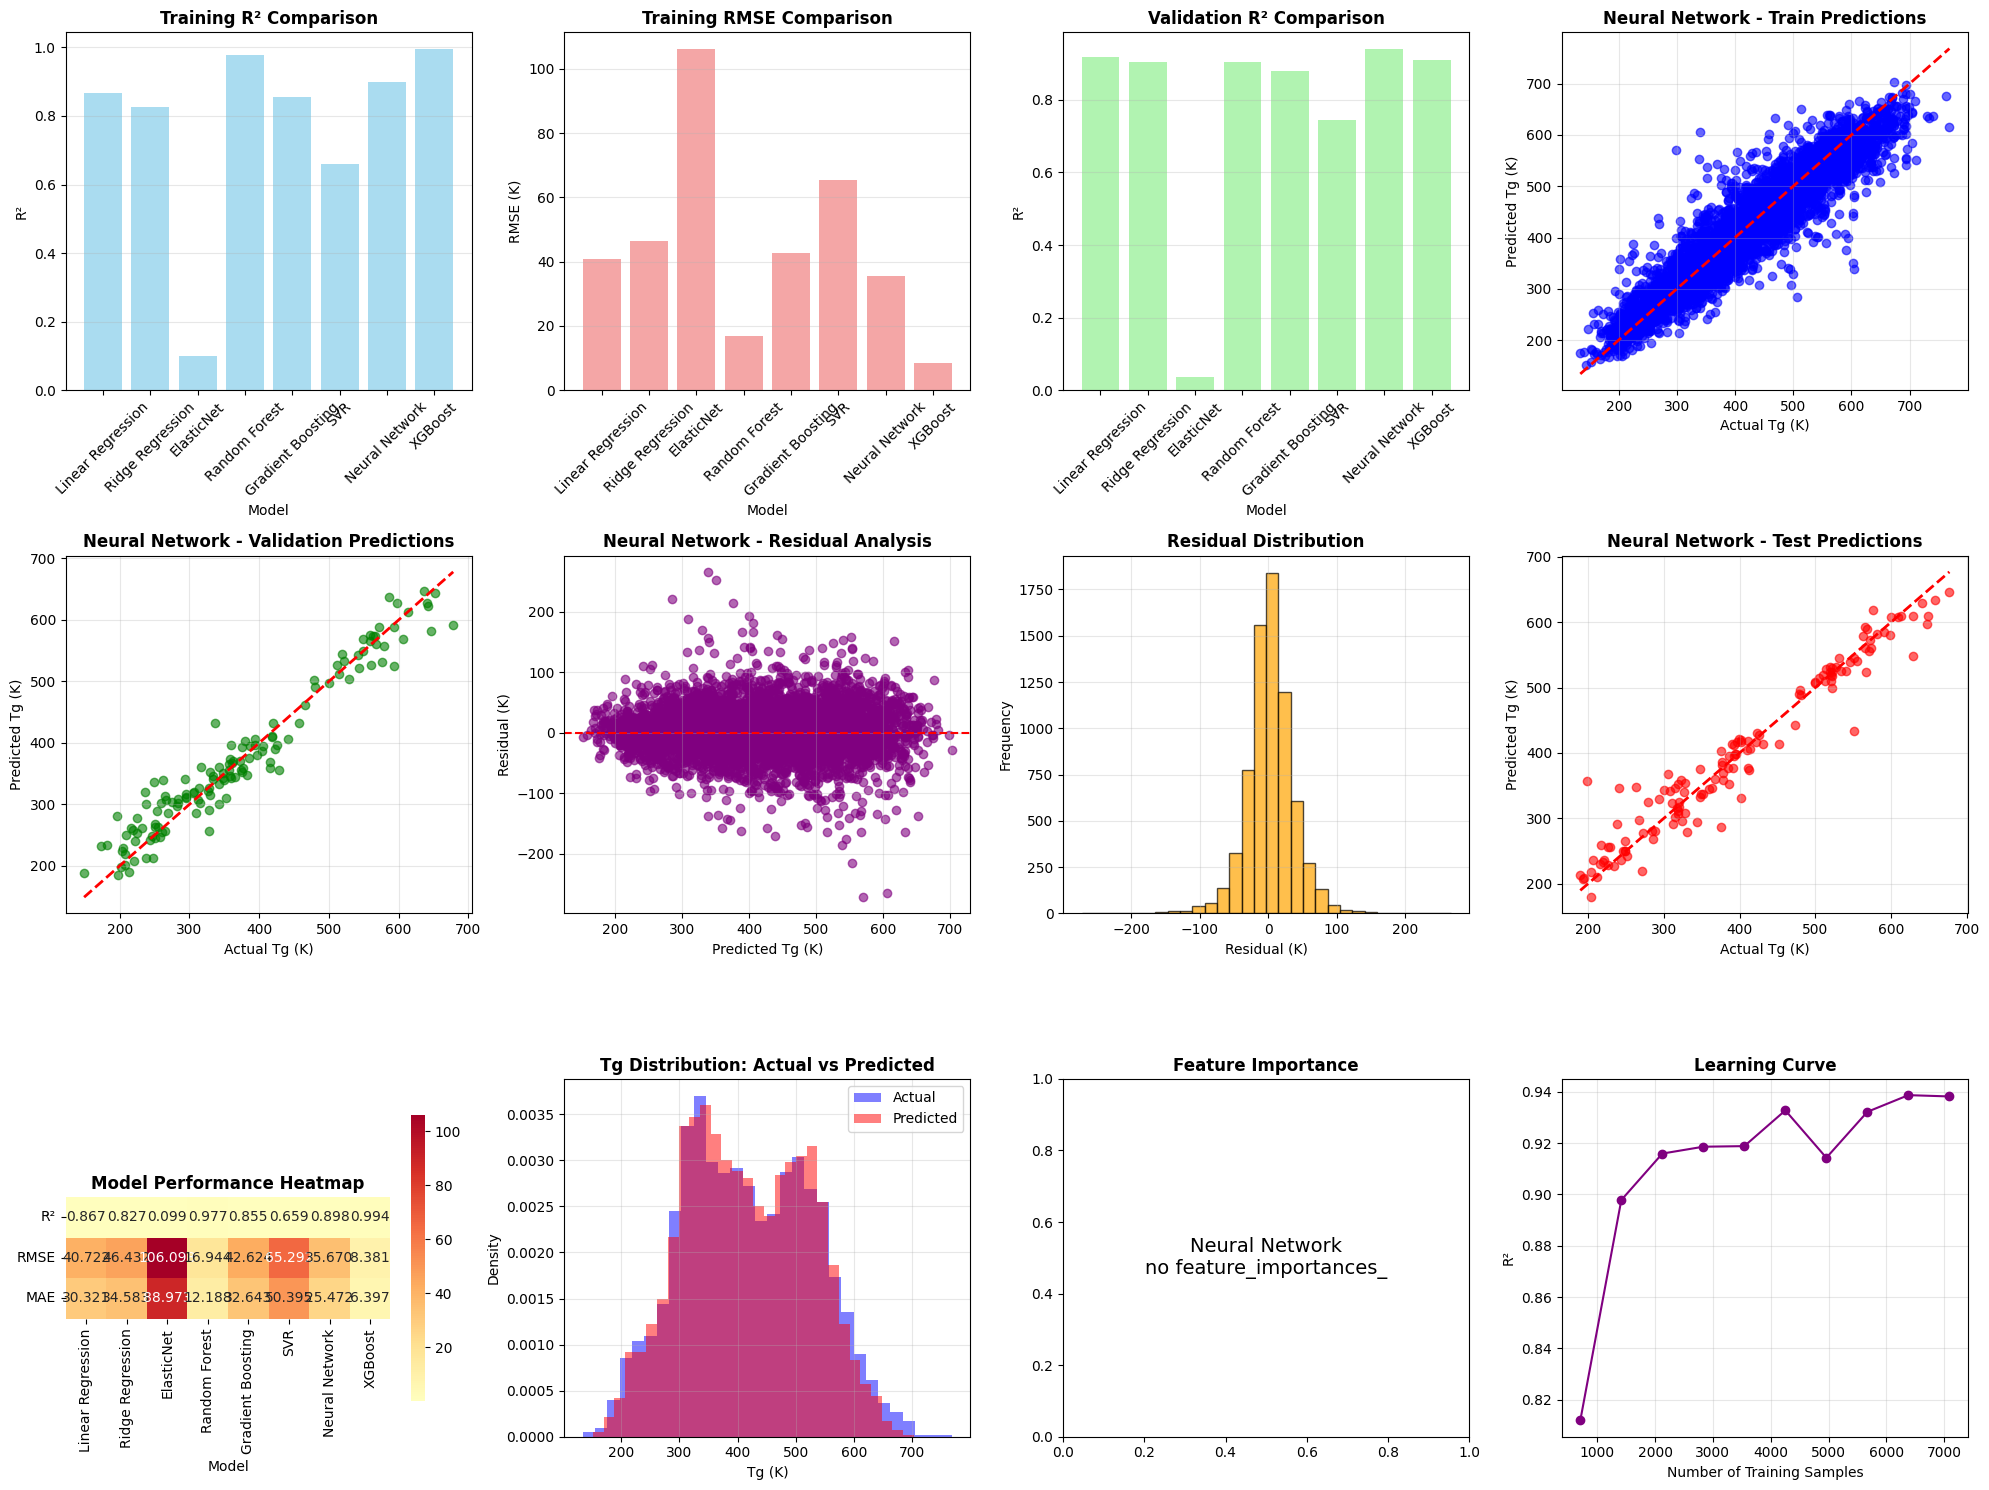

In [10]:
# Visualization & Analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# 1. Training R² comparison
plt.subplot(3, 4, 1)
train_results = results_df[results_df['Model'].str.contains('_train')]
model_names = [name.replace('_train', '') for name in train_results['Model']]
plt.bar(model_names, train_results['R²'], color='skyblue', alpha=0.7)
plt.title('Training R² Comparison', fontsize=12, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 2. Training RMSE comparison
plt.subplot(3, 4, 2)
plt.bar(model_names, train_results['RMSE'], color='lightcoral', alpha=0.7)
plt.title('Training RMSE Comparison', fontsize=12, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('RMSE (K)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 3. Validation R² comparison (if any)
if len(val_embeddings) > 0:
    val_results = results_df[results_df['Model'].str.contains('_val')]
    if len(val_results) > 0:
        plt.subplot(3, 4, 3)
        val_model_names = [name.replace('_val', '') for name in val_results['Model']]
        plt.bar(val_model_names, val_results['R²'], color='lightgreen', alpha=0.7)
        plt.title('Validation R² Comparison', fontsize=12, fontweight='bold')
        plt.xlabel('Model')
        plt.ylabel('R²')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)

# 4. Best model: train predictions vs actual
plt.subplot(3, 4, 4)
train_pred_best = predictions[f'{best_model_name}_train']
plt.scatter(train_y, train_pred_best, alpha=0.6, color='blue')
plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'r--', lw=2)
plt.xlabel('Actual Tg (K)')
plt.ylabel('Predicted Tg (K)')
plt.title(f'{best_model_name} - Train Predictions', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 5. Best model: validation predictions (if any)
if len(val_embeddings) > 0 and f'{best_model_name}_val' in predictions:
    plt.subplot(3, 4, 5)
    val_pred_best = predictions[f'{best_model_name}_val']
    plt.scatter(val_y, val_pred_best, alpha=0.6, color='green')
    plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'r--', lw=2)
    plt.xlabel('Actual Tg (K)')
    plt.ylabel('Predicted Tg (K)')
    plt.title(f'{best_model_name} - Validation Predictions', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

# 6. Residual analysis
plt.subplot(3, 4, 6)
residuals = train_y - train_pred_best
plt.scatter(train_pred_best, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tg (K)')
plt.ylabel('Residual (K)')
plt.title(f'{best_model_name} - Residual Analysis', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 7. Residual distribution
plt.subplot(3, 4, 7)
plt.hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residual (K)')
plt.ylabel('Frequency')
plt.title('Residual Distribution', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 8. Best model: test predictions (if any)
if len(test_embeddings) > 0 and f'{best_model_name}_test' in predictions:
    plt.subplot(3, 4, 8)
    test_pred_best = predictions[f'{best_model_name}_test']
    plt.scatter(test_y, test_pred_best, alpha=0.6, color='red')
    plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
    plt.xlabel('Actual Tg (K)')
    plt.ylabel('Predicted Tg (K)')
    plt.title(f'{best_model_name} - Test Predictions', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

# 9. Model performance heatmap
plt.subplot(3, 4, 9)
metrics_for_heatmap = results_df[results_df['Model'].str.contains('_train')].copy()
metrics_for_heatmap['Model'] = metrics_for_heatmap['Model'].str.replace('_train', '')
metrics_matrix = metrics_for_heatmap.set_index('Model')[['R²', 'RMSE', 'MAE']].T
sns.heatmap(metrics_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.3f', square=True, cbar_kws={"shrink": 0.8})
plt.title('Model Performance Heatmap', fontsize=12, fontweight='bold')

# 10. Tg distribution: actual vs predicted
plt.subplot(3, 4, 10)
plt.hist(train_y, bins=30, alpha=0.5, label='Actual', color='blue', density=True)
plt.hist(train_pred_best, bins=30, alpha=0.5, label='Predicted', color='red', density=True)
plt.xlabel('Tg (K)')
plt.ylabel('Density')
plt.title('Tg Distribution: Actual vs Predicted', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 11. Feature importance (if supported)
plt.subplot(3, 4, 11)
if hasattr(best_model, 'feature_importances_'):
    # top-20
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1][:20]
    plt.bar(range(20), importances[indices], color='green', alpha=0.7)
    plt.title(f'{best_model_name} - Top-20 Feature Importances', fontsize=12, fontweight='bold')
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, f'{best_model_name}\nno feature_importances_', 
             ha='center', va='center', fontsize=14, transform=plt.gca().transAxes)
    plt.title('Feature Importance', fontsize=12, fontweight='bold')

# 12. Learning curve: train size vs performance
plt.subplot(3, 4, 12)
sample_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
r2_scores_sample = []

for size in sample_sizes:
    n_samples = int(len(train_embeddings) * size)
    if n_samples > 10:
        indices = np.random.choice(len(train_embeddings), n_samples, replace=False)
        X_sample = train_embeddings[indices]
        y_sample = train_y[indices]

        temp_model = type(best_model)(**best_model.get_params() if hasattr(best_model, 'get_params') else {})
        if hasattr(temp_model, 'random_state'):
            temp_model.set_params(random_state=42)
        temp_model.fit(X_sample, y_sample)

        if len(val_embeddings) > 0:
            pred_sample = temp_model.predict(val_embeddings)
            r2_sample = r2_score(val_y, pred_sample)
        else:
            pred_sample = temp_model.predict(X_sample)
            r2_sample = r2_score(y_sample, pred_sample)

        r2_scores_sample.append(r2_sample)
    else:
        r2_scores_sample.append(0)

plt.plot([s * len(train_embeddings) for s in sample_sizes], r2_scores_sample, 'o-', color='purple')
plt.xlabel('Number of Training Samples')
plt.ylabel('R²')
plt.title('Learning Curve', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
